In [53]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('/home/miss/kaggle/File/adult.data', 
                   header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'gender',
'capital-gain', 'capital-loss', 'hours-per-week', 
       'native-country', 'income'])

# В целях упрощения мы выберем лишь некоторые столбцы
data = data[['age', 'workclass', 'education', 'gender', 
             'hours-per-week', 'occupation', 'income']]

# Ipython.display позволяет вывести красивый вывод,
# отформатированный в Jupyter Notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [28]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [29]:
print("Исходные признаки:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Признаки после get_dummies:\n", list(data_dummies.columns))

Исходные признаки:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Признаки после get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [30]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
# Берем только те столбцы, которые содержат признаки, то есть все
# столбцы, начиная с 'age' и заканчивая 
# 'occupation_ Transport-moving'
# этот диапазон содержит все признаки, кроме целевой переменной
features = data_dummies.loc[:,
                           'age': 'occupation_ Transport-moving']
# Извлекаем массивы NumPy
X = features.values
y = data_dummies['income_ >50K'].values
print('Форма массива X: {} форма массива y {}'.format(X.shape,
                                                     y.shape))

Форма массива X: (32561, 44) форма массива y (32561,)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                random_state=0)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.8092371944478566

In [41]:
# создаем дата-фрейм c признаком, который принимает целочисленные
# значения, и категориальным признаком, у которой значения
# являются признаком
demo_df = pd.DataFrame({'Целочисленный признак': [0, 1, 2, 1],
'Категориальный признак': ['socks', 'fox', 'socks', 'box']})
demo_df

,Целочисленный признак,Категориальный признак
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [42]:
pd.get_dummies(demo_df)

,Целочисленный признак,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [43]:
demo_df['Целочисленный признак'] = \
    demo_df['Целочисленный признак'].astype(str)
pd.get_dummies(demo_df, columns=['Целочисленный признак', 
                                 'Категориальный признак'])

,Целочисленный признак_0,Целочисленный признак_1,Целочисленный признак_2,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


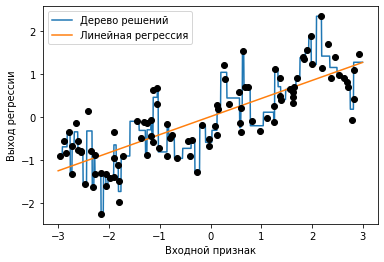

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='Дерево решений')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='Линейная регрессия')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.legend(loc='best')

In [65]:
bins = np.linspace(-3, 3, 11)
print('категории: {}'.format(bins))

категории: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [66]:
which_bin = np.digitize(X, bins=bins)
print("\nТочки данных:\n", X[:5])
print("\nКатегории для точек данных:\n", which_bin[:5])


Точки данных:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Категории для точек данных:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [68]:
from sklearn.preprocessing import OneHotEncoder
# преобразовываем с помощью OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit находит уникальные значения, имеющиеся в which_bin
encoder.fit(which_bin)
# transform осущствляет прямое кодирование
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [69]:
print("форма массива X_binned: {}".format(X_binned.shape))

форма массива X_binned: (100, 10)


Text(0.5, 0, 'Входной признак')

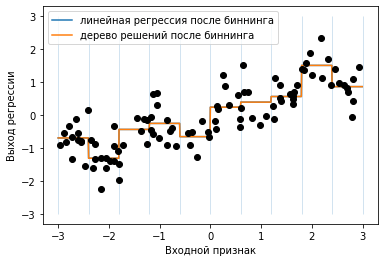

In [70]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 
         label='линейная регрессия после биннинга')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 
         label='дерево решений после биннинга')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")